In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import files
access_csv = files.upload()

Saving Titanic.csv to Titanic.csv


In [ ]:
df_full = pd.read_csv('Titanic.csv')
df_full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_full['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
df_full.duplicated().sum()

0

In [ ]:
df_full.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
Age = df_full['Age'].fillna(value = df_full['Age'].median())

In [ ]:
Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
df_drop = df_full.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age'], axis=1, inplace=True)

In [ ]:
df_full

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male
...,...,...,...
886,0,2,male
887,1,1,female
888,0,3,female
889,1,1,male


In [ ]:
df = pd.concat([df_full, Age], axis=1)

In [ ]:
df

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
886,0,2,male,27.0
887,1,1,female,19.0
888,0,3,female,28.0
889,1,1,male,26.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse=False, dtype=np.int32)

In [ ]:
df_ohe = ohe.fit_transform(df[['Sex']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
np.hstack((df[['Survived', 'Pclass', 'Age']].values, df_ohe))

array([[ 0.,  3., 22.,  1.],
       [ 1.,  1., 38.,  0.],
       [ 1.,  3., 26.,  0.],
       ...,
       [ 0.,  3., 28.,  0.],
       [ 1.,  1., 26.,  1.],
       [ 0.,  3., 32.,  1.]])

In [ ]:
Gender = pd.DataFrame(df_ohe, columns=['Gender'])
Gender.head(5)

,Gender
0,1
1,0
2,0
3,0
4,1


In [ ]:
dataset = pd.concat([df,Gender], axis=1).drop(columns=['Sex'])
dataset

,Survived,Pclass,Age,Gender
0,0,3,22.0,1
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,1
...,...,...,...,...
886,0,2,27.0,1
887,1,1,19.0,0
888,0,3,28.0,0
889,1,1,26.0,1


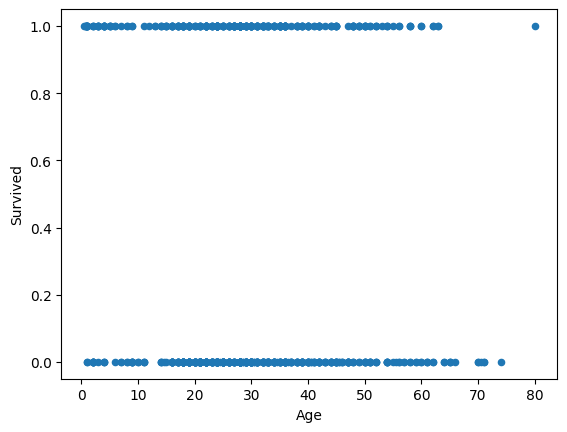

In [ ]:
dataset.plot(kind='scatter', x='Age', y='Survived')
plt.show()

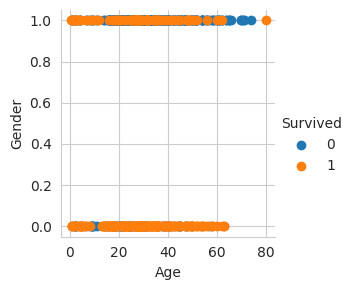

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(dataset, hue='Survived').map(plt.scatter, 'Age', 'Gender').add_legend()
plt.show()

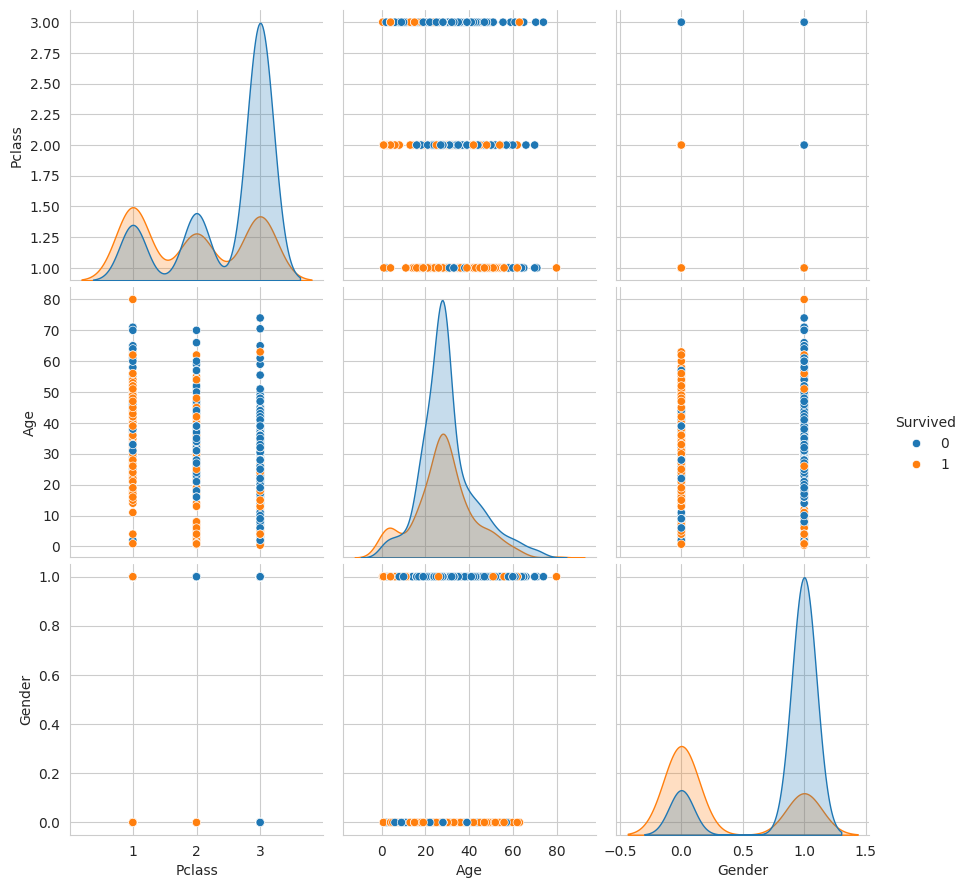

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(dataset[['Survived',	'Pclass',	'Age',	'Gender']], hue='Survived', height=3)
plt.show()

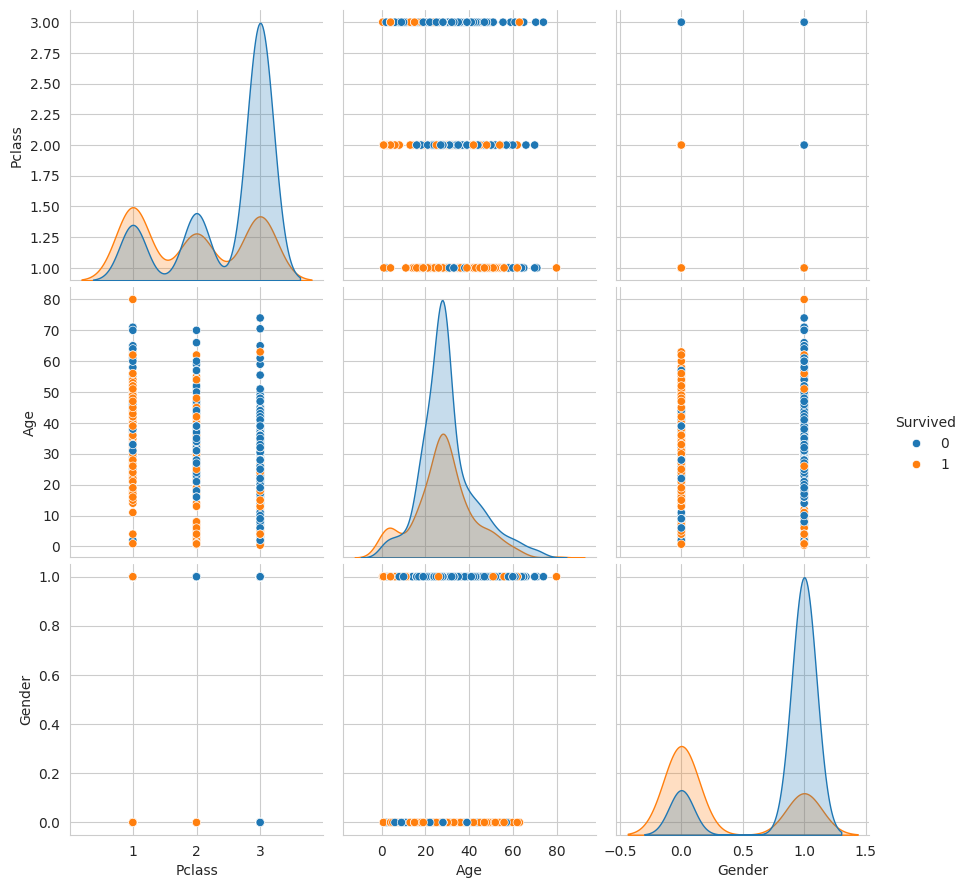

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(dataset, hue='Survived', height=3)
plt.show()

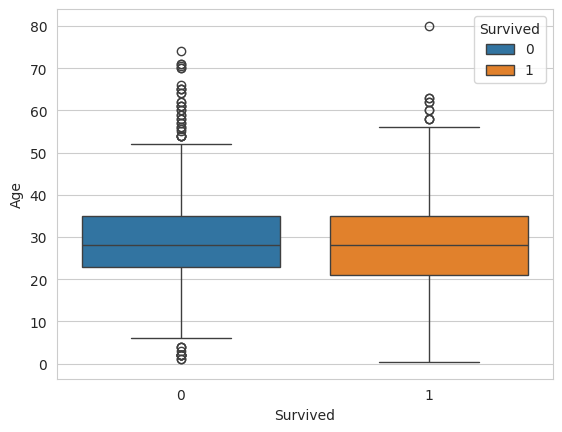

In [ ]:
sns.boxplot(x='Survived', y='Age', data=dataset, hue='Survived')
plt.show()

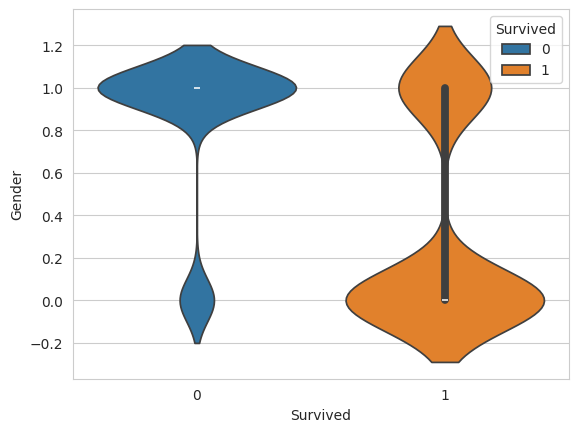

In [ ]:
sns.violinplot(x='Survived', y='Gender', data=dataset, hue='Survived')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scalled = scaler.fit_transform(dataset)
scalled

array([[-0.78927234,  0.82737724, -0.56573646,  0.73769513],
       [ 1.2669898 , -1.56610693,  0.66386103, -1.35557354],
       [ 1.2669898 ,  0.82737724, -0.25833709, -1.35557354],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -1.35557354],
       [ 1.2669898 , -1.56610693, -0.25833709,  0.73769513],
       [-0.78927234,  0.82737724,  0.20276197,  0.73769513]])

In [ ]:
scalled_df = pd.DataFrame(scalled, columns=['Survived', 'Pclass', 'Age', 'Gender'])
scalled_df

,Survived,Pclass,Age,Gender
0,-0.789272,0.827377,-0.565736,0.737695
1,1.266990,-1.566107,0.663861,-1.355574
2,1.266990,0.827377,-0.258337,-1.355574
3,1.266990,-1.566107,0.433312,-1.355574
4,-0.789272,0.827377,0.433312,0.737695
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,0.737695
887,1.266990,-1.566107,-0.796286,-1.355574
888,-0.789272,0.827377,-0.104637,-1.355574
889,1.266990,-1.566107,-0.258337,0.737695


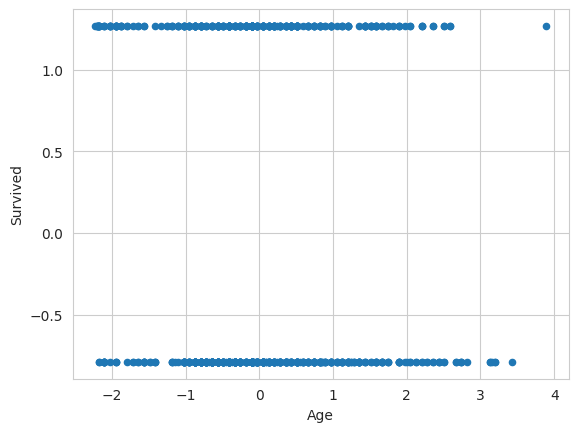

In [ ]:
scalled_df.plot(kind='scatter', x='Age', y='Survived')
plt.show()

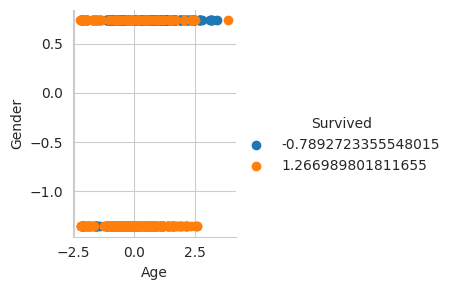

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(scalled_df, hue='Survived').map(plt.scatter, 'Age', 'Gender').add_legend()
plt.show()

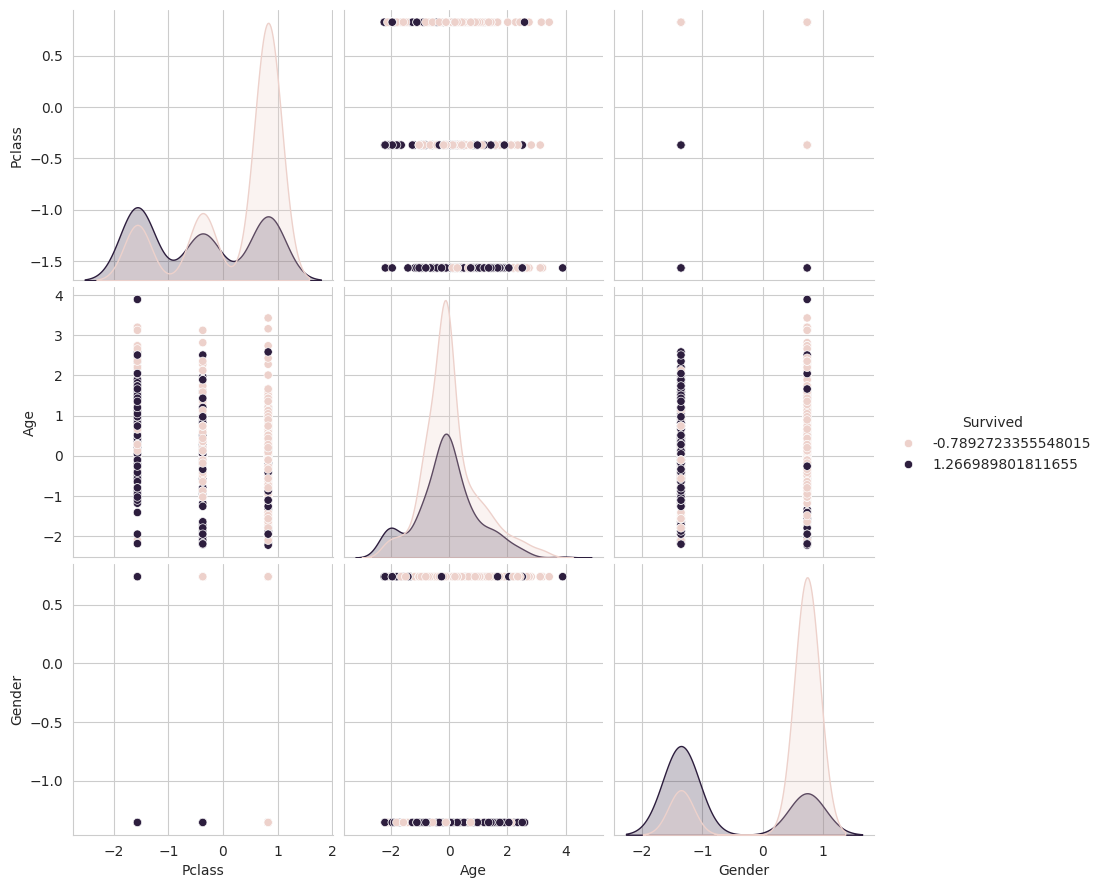

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(scalled_df[['Survived',	'Pclass',	'Age',	'Gender']], hue='Survived', height=3)
plt.show()

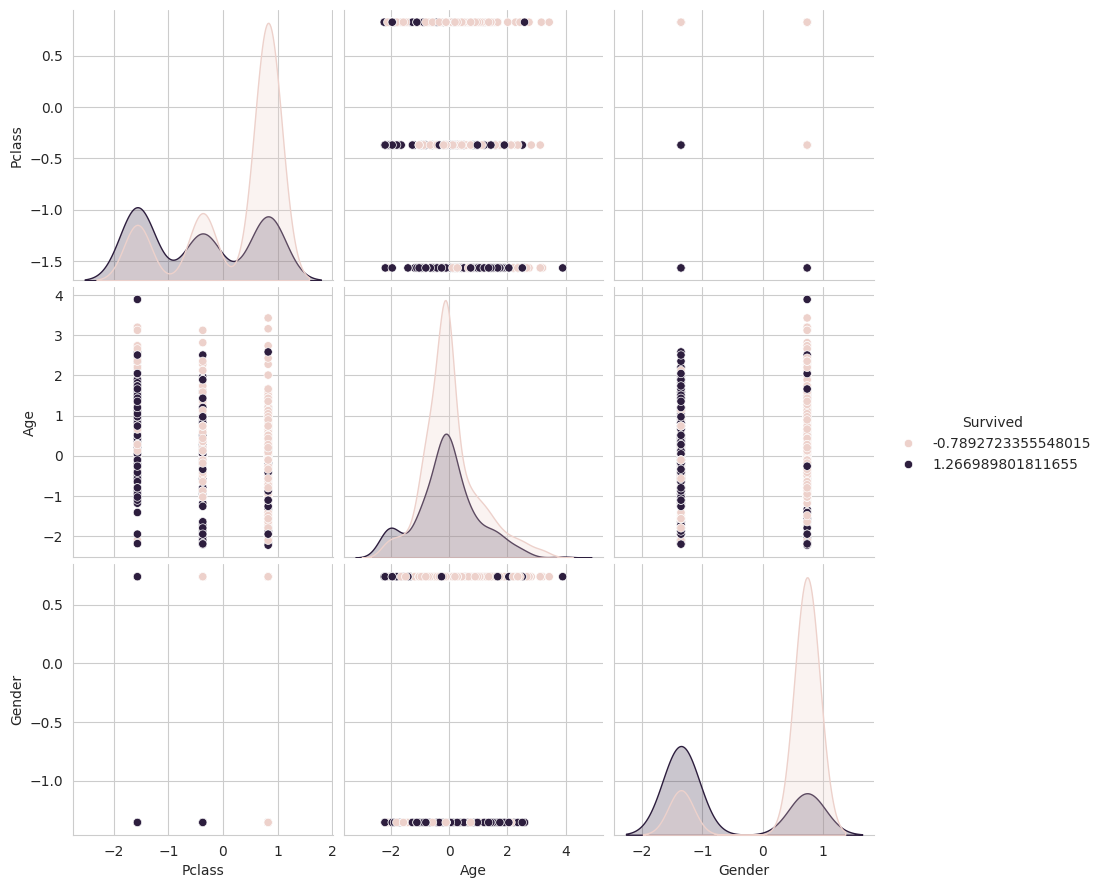

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(scalled_df, hue='Survived', height=3)
plt.show()

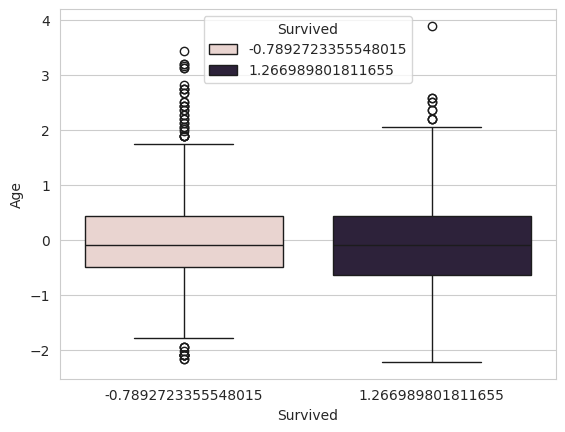

In [ ]:
sns.boxplot(x='Survived', y='Age', data=scalled_df, hue='Survived')
plt.show()

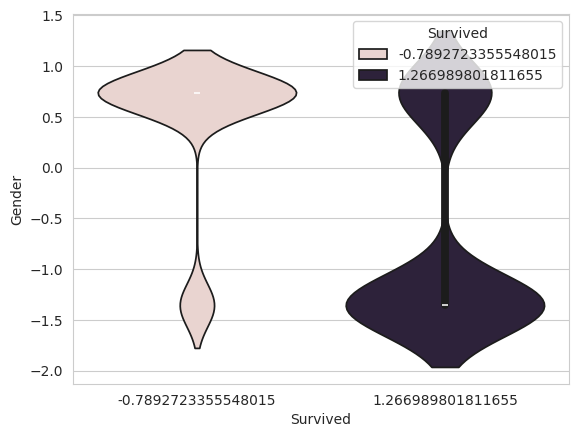

In [ ]:
sns.violinplot(x='Survived', y='Gender', data=scalled_df, hue='Survived')
plt.show()